# Bayesian Correlated t-test
Module `correlated_ttest` in `bayesiantests` can be used to perform the correlated t-test on the performance of two classifiers that have been assessed by $m$-runs of $k$-fold cross-validation  on the same dataset

This notebook demonstrates the use of the module.


We will load the classification accuracies of the naive Bayesian classifier (NBC) and AODE on the dataset *Anneal* from the file `Data/nbc_anneal.csv` and `Data/aode_anneal.csv`.  The classifiers have been evaluated by 10-runs of 10-fold cross-validation.

In [5]:
import numpy as np
Acc_nbc =  np.loadtxt('Data/nbc_anneal.csv',  delimiter=',', skiprows=1)
Acc_aode = np.loadtxt('Data/aode_anneal.csv', delimiter=',', skiprows=1)
names = ("NBC", "AODE")
x=np.zeros((len(Acc_nbc),2),'float')
x[:,1]=Acc_nbc/100
x[:,0]=Acc_aode/100
#we consider the difference of accuracy scaled in (0,1)

Functions in the module accept the following arguments.

- `x`: a 2-d array with scores of two models (each row corresponding to a data set) or a vector of differences.
- `rope`: the region of practical equivalence. We consider two classifiers equivalent if the difference in their performance is smaller than `rope`. 
- `runs`:  number of repetitions of cross validation 
- `names`: the names of the two classifiers; if `x` is a vector of differences, positive values mean that the second (right) model had a higher score.
- `verbose`: when True the functions also prints out the probabilities

In [6]:
import bayesiantests as bt
rope=0.01
left, within, right = bt.correlated_ttest(x, rope=rope,runs=10,verbose=True,names=names)

P(NBC > AODE) = 0.9542966354882696, P(rope) = 0.04570306097263277, P(AODE > NBC) = 3.0353909763469744e-07


We can also plot the posterior distribution. 

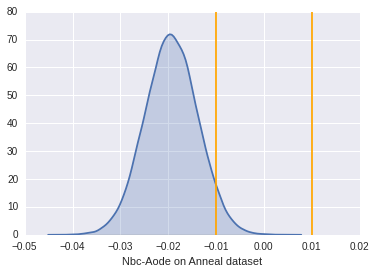

In [15]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as snb
#generate samples from posterior (it is not necesssary because the posterior is a Student)
samples=bt.correlated_ttest_MC(x, rope=rope,runs=10,nsamples=50000)
#plot posterior
snb.kdeplot(samples, shade=True) 
#plot rope region
plt.axvline(x=-rope,color='orange')
plt.axvline(x=rope,color='orange')
#add label
plt.xlabel('Nbc-Aode on Anneal dataset') 

We will load the classification accuracies of NBC and AODE on the dataset *Audiology* from the file.  The classifiers have been evaluated by 10-runs of 10-fold cross-validation.

In [8]:
import numpy as np
Acc_nbc =  np.loadtxt('Data/nbc_audiology.csv',  delimiter=',', skiprows=1)
Acc_aode = np.loadtxt('Data/aode_audiology.csv', delimiter=',', skiprows=1)
names = ("NBC", "AODE")
diff=(Acc_nbc-Acc_aode)/100.0 #we consider the difference of accuracy scaled in (0,1)

In [9]:
import bayesiantests as bt
rope=0.01
left, within, right = bt.correlated_ttest(diff, rope=rope,runs=10,verbose=True,names=names)

P(NBC > AODE) = 0.08214267577999079, P(rope) = 0.9085092663989454, P(AODE > NBC) = 0.009348057821063849


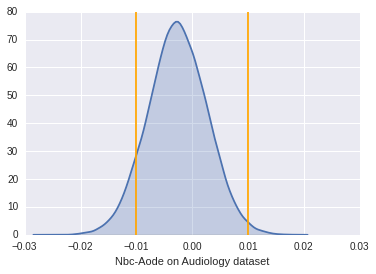

In [16]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as snb
#generate samples from posterior (it is not necesssary because the posterior is a Student)
samples=bt.correlated_ttest_MC(diff, rope=rope,runs=10,nsamples=50000)
#plot posterior
snb.kdeplot(samples, shade=True) 
#plot rope region
plt.axvline(x=-rope,color='orange')
plt.axvline(x=rope,color='orange')
#add label
plt.xlabel('Nbc-Aode on Audiology dataset') 

## References 

`@ARTICLE{bayesiantests2016,
   author = {{Benavoli}, A. and {Corani}, G. and {Demsar}, J. and {Zaffalon}, M.},
   title = "{Time for a change: a tutorial for comparing multiple classifiers through Bayesian analysis}",
   journal = {ArXiv e-prints},
   archivePrefix = "arXiv",
   eprint = {1606.04316},
   url={https://arxiv.org/abs/1606.04316},
   year = 2016,
   month = jun
}`

`@article{corani2015a,
  year = {2015},
  volume = {100},
  number = {2},
  journal = {Machine Learning},
  doi = {10.1007/s10994-015-5486-z},
  title = {{A Bayesian approach for comparing cross-validated algorithms on multiple data sets}},
  publisher = {Springer US},
  author = {Corani, Giorgio and Benavoli, Alessio},
  pages = {285--304},
  url = {http://www.idsia.ch/~alessio/corani2015a.pdf}
}`